<a href="https://colab.research.google.com/github/ragul0033/true-or-fake/blob/main/Ragul_finel_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

#import dataset



In [20]:
data=pd.read_csv('/content/Maternal Health Risk Data Set.csv')

#import libraries


In [ ]:

import pandas as pd


In [ ]:
import numpy as np


#data preprocessing


In [28]:
data.dtypes



,0
Age,int64
SystolicBP,int64
DiastolicBP,int64
BS,float64
BodyTemp,float64
HeartRate,int64
RiskLevel,object


In [29]:
data.shape


(1014, 7)

In [30]:
data.columns


Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [32]:
data.isnull().sum()


,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


In [33]:
data.describe()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [34]:
data.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [35]:
data.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [36]:
data.tail()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [37]:
data['RiskLevel'].values


array(['high risk', 'high risk', 'high risk', ..., 'high risk',
       'high risk', 'mid risk'], dtype=object)

In [38]:
data['RiskLevel'].value_counts()


,count
RiskLevel,
low risk,406
mid risk,336
high risk,272


In [39]:
data.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


#EXPLORATORY DATA ANALYSIS


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors


In [41]:
data['RiskLevel'].value_counts()


,count
RiskLevel,
low risk,406
mid risk,336
high risk,272


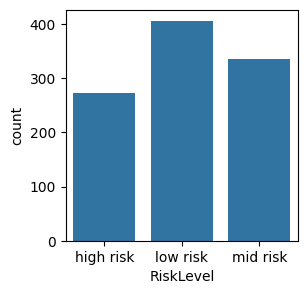

In [43]:
plt.figure(figsize=(3,3))
sns.countplot(x='RiskLevel',data=data)
plt.show()



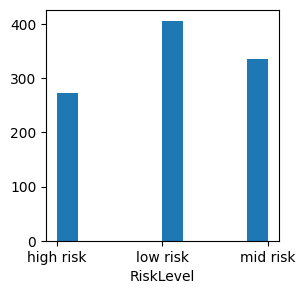

In [44]:
plt.figure(figsize=(3,3))
plt.hist(x='RiskLevel',data=data)
plt.xlabel('RiskLevel')
plt.show()


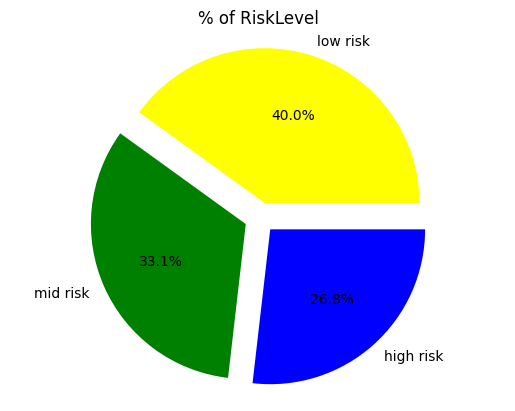

In [45]:

RiskLevel=data['RiskLevel'].value_counts(normalize=True)*100
explode=(0.1,0.1,0.1)
colors=('yellow','green','blue')
plt.pie(RiskLevel,labels=RiskLevel.index,autopct='%1.1f%%',explode=explode,colors=colors)
plt.title('% of RiskLevel')
plt.axis('equal')
plt.show()


In [46]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


In [47]:

le=LabelEncoder()#transform cata to num
for col in data.columns:
  if data[col].dtype=='object':#current type  is catagorical value
    data[col]=le.fit_transform(data[col])#to transform the num


In [48]:
imputer=SimpleImputer(strategy='median')#used for filli the missing value
mis_cols=['RiskLevel']
data[mis_cols]=imputer.fit_transform(data[mis_cols])#replaing the missing value


In [49]:
data.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0.0
1,35,140,90,13.0,98.0,70,0.0
2,29,90,70,8.0,100.0,80,0.0
3,30,140,85,7.0,98.0,70,0.0
4,35,120,60,6.1,98.0,76,1.0


#standardition feature scaling


In [50]:

from sklearn.preprocessing import StandardScaler


In [51]:
x=data.iloc[:,:6]
y=data['RiskLevel']


In [52]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)


In [53]:
x.head()


,0,1,2,3,4,5
0,-0.361738,0.913396,0.255023,1.905890,-0.485215,1.446956
1,0.380777,1.457027,0.975539,1.298340,-0.485215,-0.532088
2,-0.064732,-1.261127,-0.465493,-0.220537,0.973884,0.704815
3,0.009519,1.457027,0.615281,-0.524312,-0.485215,-0.532088
4,0.380777,0.369765,-1.186009,-0.797710,-0.485215,0.210054


#model building

In [54]:

from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [55]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [56]:
logreg = lr(max_iter=1000)


In [57]:
logreg.fit(x_train, y_train)


LogisticRegression(max_iter=1000)

In [58]:
y_pred = logreg.predict(x_test)


In [59]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


In [60]:

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score:{f1}')

Accuracy: 0.6502463054187192
Precision: 0.6593971992902409
Recall: 0.6502463054187192
F1 Score:0.6120297148334531
